In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('Reviews.csv')  # Replace with your dataset path
df = df[['Text', 'Score']]  # Keep only review text and rating
df.head()


Text  Score
0  I have bought several of the Vitality canned d...      5
1  Product arrived labeled as Jumbo Salted Peanut...      1
2  This is a confection that has been around a fe...      4
3  If you are looking for the secret ingredient i...      2
4  Great taffy at a great price.  There was a wid...      5

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation & numbers
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    return ' '.join(tokens)

df['cleaned_review'] = df['Text'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CompuMarts\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\CompuMarts\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text  Score  \
0  I have bought several of the Vitality canned d...      5   
1  Product arrived labeled as Jumbo Salted Peanut...      1   
2  This is a confection that has been around a fe...      4   
3  If you are looking for the secret ingredient i...      2   
4  Great taffy at a great price.  There was a wid...      5   

                                      cleaned_review  
0  bought several vitality canned dog food produc...  
1  product arrived labeled jumbo salted peanutsth...  
2  confection around century light pillowy citrus...  
3  looking secret ingredient robitussin believe f...  
4  great taffy great price wide assortment yummy ...

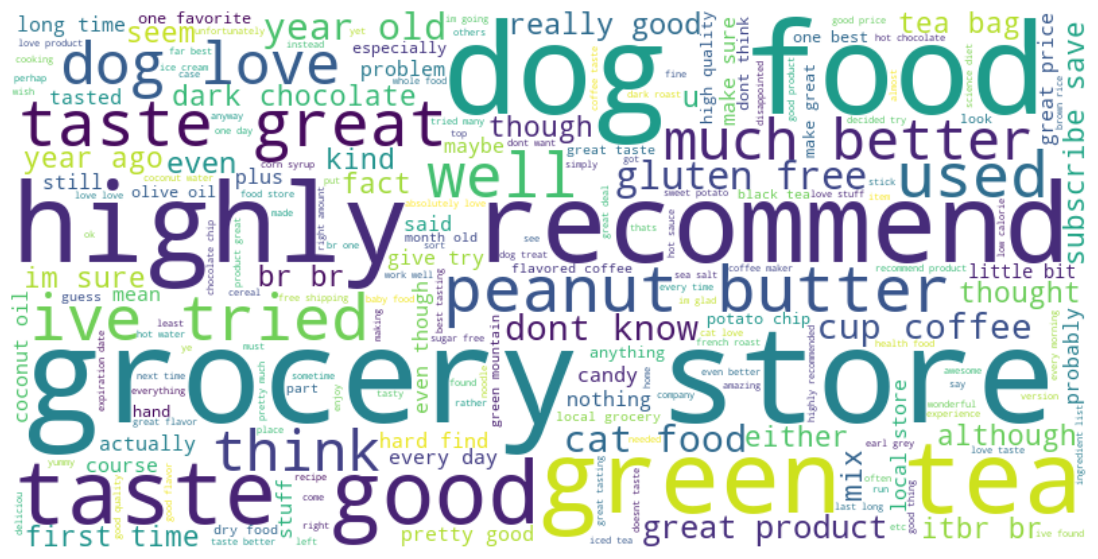

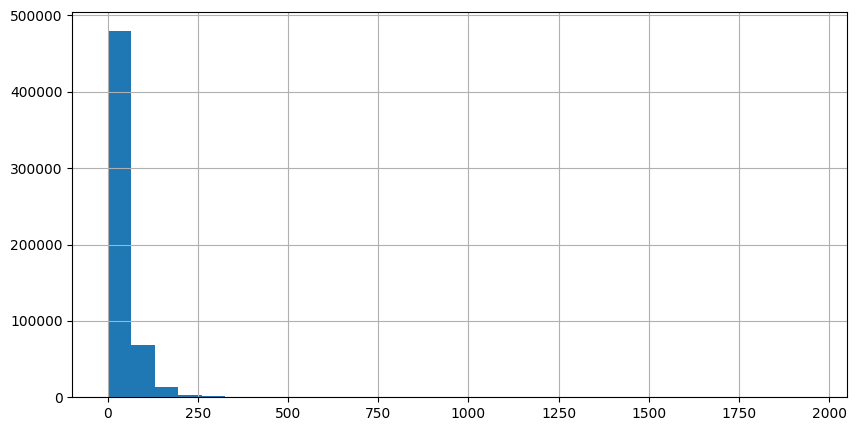

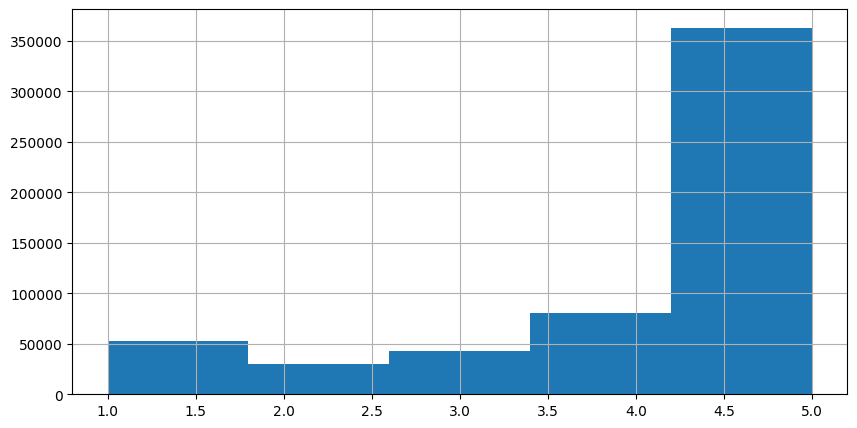

In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Word Cloud
text = ' '.join(df['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Histogram of review length
df['review_length'] = df['cleaned_review'].apply(lambda x: len(x.split()))
df['review_length'].hist(bins=30, figsize=(10,5))
plt.show()

# Rating distribution
df['Score'].hist(bins=5, figsize=(10,5))
plt.show()


# Milestone 2: Sentiment Modeling

In [5]:
def label_sentiment(rating):
    if rating <= 2:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

df['sentiment'] = df['Score'].apply(label_sentiment)


In [6]:
# Machine Learning Model SVM
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Predictions
y_pred = model.predict(X_test_vec)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.73      0.67      0.70     16181
     neutral       0.51      0.18      0.27      8485
    positive       0.90      0.97      0.93     89025

    accuracy                           0.87    113691
   macro avg       0.71      0.61      0.63    113691
weighted avg       0.85      0.87      0.85    113691

[[10845   618  4718]
 [ 1888  1559  5038]
 [ 2078   865 86082]]


In [7]:
#Save the model and vectorizer
import joblib
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
# The model and vectorizer are saved for future use

['tfidf_vectorizer.pkl']